In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import keras
import matplotlib.pyplot as plt
import os
import warnings
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM


Using TensorFlow backend.


In [4]:
df=pd.read_csv('data_for_stock_predictor.csv',delimiter=',')
df.drop(labels='Date',axis=1)

df = df.iloc[::-1]

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
warnings.filterwarnings("ignore")
print(df)

           Date    Open    High     Low   Close   Volume
1257  29-May-12  298.20  299.86  294.45  297.47  2606651
1256  30-May-12  294.37  296.25  292.06  294.41  1906629
1255  31-May-12  294.65  295.29  289.79  290.72  2969455
1254   1-Jun-12  286.18  286.61  284.46  285.78  3058314
1253   4-Jun-12  285.40  290.54  285.29  289.58  2433786
1252   5-Jun-12  288.01  289.35  283.52  285.49  2340477
1251   6-Jun-12  288.53  291.28  287.09  290.58  2096173
1250   7-Jun-12  294.09  294.24  288.91  289.40  1759532
1249   8-Jun-12  288.21  290.79  287.58  290.52  1410366
1248  11-Jun-12  292.40  292.95  283.63  284.53  2662269
1247  12-Jun-12  285.17  285.44  279.57  282.83  3224142
1246  13-Jun-12  281.14  283.78  279.62  280.83  1954607
1245  14-Jun-12  280.93  282.82  278.54  279.80  2345107
1244  15-Jun-12  280.45  282.54  278.82  282.54  3002511
1243  18-Jun-12  281.59  287.39  279.90  285.71  2497864
1242  19-Jun-12  287.08  292.43  286.85  291.06  2076629
1241  20-Jun-12  290.19  290.29

In [70]:

X_train=df[200:1200]

Y_train=np.array([df['Close'][1257-i-1] for i in range (200,1200)])

normalizer=Y_train[0]
print(normalizer)
Y_train=np.array([Y_train/normalizer-1])
Y_train=np.reshape(Y_train,[-1,1])

X_test=df[1200:]
Y_test=np.array([df['Close'][1257-i-1] for i in range (1199,1257)])
print(Y_test)

Y_test=np.array([Y_test/normalizer-1])



epoch=10
num_features=5
train_features=np.array([X_train[label] for label in list(X_train)])
print(train_features[:,0])
normalised_features1=[train_features[j]/train_features[j,0]-1 for j in range(1,6)]
test_features=np.array([X_test[label] for label in list(X_test)])
normalised_features2=[test_features[j]/train_features[j,0]-1 for j in range(1,6)]
train_features=np.reshape(np.transpose(normalised_features1),[-1,1,num_features])


test_features=np.reshape(np.transpose(normalised_features2),[-1,1,num_features])
np.shape(train_features)


406.07
[ 851.15  853.64  857.84  861.4   864.58  865.91  868.39  870.    872.37
  867.91  850.14  849.8   839.65  835.14  838.51  840.63  849.87  849.48
  847.8   856.75  852.57  848.91  845.1   842.1   841.7   839.88  841.46
  840.18  855.13  853.99  856.51  860.08  858.95  878.93  888.84  889.14
  891.44  924.52  932.82  937.09  948.45  954.72  950.28  958.69  956.71
  954.84  955.89  955.14  959.22  964.61  942.17  950.5   954.65  964.07
  970.55  977.61  991.86  993.27]
['18-Mar-13' 402.89999999999998 406.79000000000002 401.13999999999999
 404.30000000000001 1838552]


(1000, 1, 5)

In [64]:
#model 
print(test_features)
          
          
          
          
          

[[[1.1029039463886821 1.0977162663782294 1.1077927905469411
   1.1052436309671037 -0.43504671067231171]]

 [[1.1174484983866968 1.1065660414464462 1.1220770803210849
   1.1114024239426166 -0.43986680822734414]]

 [[1.1188632414991315 1.1158583052680746 1.125616991574014
   1.1217907494434827 -0.26697912270090807]]

 [[1.1412261106974437 1.1245114186681087 1.1379318941018099
   1.1305960920108831 -0.2730230094117545]]

 [[1.1365847604864734 1.1316404041397279 1.1459340878496289
   1.1384615384615384 -0.36547620083631027]]

 [[1.1438322164308761 1.132746626023255 1.1442139901281347
   1.1417511748701457 -0.42253904159360189]]

 [[1.1542318193100027 1.138400648983505 1.1471306775689287
   1.1478852337373238 -0.27503546269020407]]

 [[1.1606602134524695 1.1453575554954645 1.1626364860148577
   1.1518674251793222 -0.39928160857022266]]

 [[1.1684785306527674 1.1495611986528673 1.1647554469761183
   1.1577294088548107 0.01615401685674378]]

 [[1.1580541077190372 1.1395314535755547 1.15550680

In [59]:
model=Sequential()
model.add(LSTM(input_dim=5,output_dim=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200,return_sequences=False))
model.add(Dropout(0.2))          
model.add(Dense(output_dim=1))
model.add(Activation('linear'))

model.compile(loss='mse',optimizer='rmsprop')
          

In [60]:
model.fit(train_features,Y_train,batch_size=50,nb_epoch=epoch)


Epoch 1/10
1000/1000 [==============================] - 2s - loss: 0.1449     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.0036     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.0037     


In [63]:
prediction=model.predict(test_features)

prediction_list=np.reshape(prediction,(-1))

print(prediction_list)
print(Y_test)
actual_values=np.reshape(Y_test,(-1))

[ 1.04373932  1.05478096  1.0618062   1.07517695  1.07887149  1.08125412
  1.08859551  1.09597087  1.10281706  1.09204841  1.07638443  1.04771328
  1.0200721   1.01810575  1.00566196  1.02133107  1.03760028  1.04559755
  1.03999317  1.05488396  1.04680133  1.05570626  1.04268956  1.02785254
  1.02747571  1.02154541  1.02165771  1.02272129  1.04096818  1.05455232
  1.06300688  1.07169127  1.0707407   1.10509908  1.1363399   1.1454401
  1.14836991  1.23929465  1.24287736  1.26188922  1.27751184  1.30392766
  1.30550849  1.30537367  1.31847167  1.30625153  1.30316138  1.30988169
  1.31436276  1.32876277  1.30077779  1.28971434  1.3075459   1.32189059
  1.34597695  1.35892987  1.38658321  1.40178132]
[[ 1.09606718  1.10219913  1.11254217  1.12130913  1.1291403   1.13241559
   1.13852291  1.14248775  1.14832418  1.13734085  1.09357992  1.09274263
   1.06774694  1.05664048  1.06493954  1.07016032  1.09291501  1.09195459
   1.08781737  1.10985791  1.09956411  1.09055089  1.08116827  1.0737803

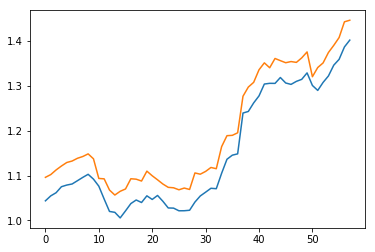

In [62]:
plt.plot(range(0,len(prediction)),prediction_list)
plt.plot(range(0,len(prediction)),actual_values)
plt.show()

In [71]:
prediction=model.predict(np.array([[[1.462149416728717 ,1.4493964945057645 ,1.46138505260009, 1.4567647786297302,
   -0.10994304213315698]]]))

(prediction+1)*406



array([[ 975.12310791]], dtype=float32)

In [ ]:
1.40